### grp

## Hands-On Machine Learning with Scikit-Learn & TensorFlow

## CHAPTER 1: The Machine Learning Landscape

-  Machine Learning => science of programming computers to learn from data  
-  Training Set => known examples the computer uses to learn from    
-  Accuracy => ratio of correctly classified dependent variable    
-  Data Mining => discover previously unknown patterns in data
-  Attributes => data type ... aka predictor variable(s) metadata [ex: mileage]
-  Features => attribute plus its value ... aka predictor variable(s) [ex: mileage = 15,000]

## Supervised Learning:
-  training data fed to algorithm includes solutions (labels)
-  system uses training data to learn from features and labels

### Algorithms:
-  k-Nearest Neighbors (KNNs)
-  Linear Regression
-  Logistic Regression
-  Support Vector Machines (SVMs)
-  Decision Trees and Random Forests
-  Neural Networks

## Unsupervised Learning:
-  training data fed to algorithm does not include solutions (unlabeled)
-  system tries to learn without a teacher

### Algorithms:
-  Clustering:
    -  k-Means
    -  Hierarchical Cluster Analysis (HCA)
    -  Expectation Maximization
-  Visualization and Dimensionality Reduction
    -  Principal Component Analysis (PCA)
    -  Kernel PCA
    -  Locally-Linear Embedding (LLE)
    -  t-distributed Stochastic Neighbor Embedding (t-SNE)
-  Association Rule Learning:
    -  Apriori
    -  Eclat

### Examples:
-  Dimensionality Reduction:
    -  goal is to simplify the data w/o loosing too much information:
        -  merge serveral correlated features into one ... aka "feature extraction"
    -  use DR prior to ML algorithm to improve performance (memory/disk space)
-  Anomaly Detection:
    -  goal is to detect unusual behaviour in the dataset (outliers)
-  Association:
    -  goal is to discover interesting relations between attributes (customer buying patterns)

## Semisupervised Learning:
-  training data partially labeled

## Reinforcement Learning:
-  Agent:
    -  observes environment, select, and perform actions
    -  receives "rewards" in return or "penalties" as negative reward
-  Policy:
    -  agent must learn by itself to perform best strategy (policy)
    -  defines what action the agent should choose when it is in a given situation
    
### Example:
-  Robotic Process Automation
    

## Batch [Offline] Learning:
-  system is incapable of learning incrementally
-  trained offline:
    -  1 - system is trained
    -  2 - launched into production and runs w/o learning anymore
    -  3 - applies results to new data based on what it has learned previously
-  incorporating new data to learn from:
    -  ***new version must be re-trained on old + new data and then replace old model with new updated model***

## Online [Incremental] Learning:
-  train the system incrementally by feeding data via mini-batches
-  learns about new data on the fly as it arrives
-  "online" learning typically still done "offline"
-  solid method for systems with limited computing resources [memory]
-  algorithm loads part of the data, runs a training step on the data, and repeats the process until it has trained whole dataset

## Instance-Based Learning vs. Model-Based Learning Generalizing
-  IBL:
    -  systems learns from examples by heart via similarity measure:
        -  ex: compares word counts between unknown email and known spam email to make a prediction
-  MBL:
    -  system builds a model via parameter tuning to make predictions
    -  uses a performance measure:
        -  utility function => measures how good the model is
        -  cost function => measures how bad the model is:
            -  linear regression ex:  (measures distance between the linear model's prediction and the training examples; **objective is to minimize this distance**
            -  algorithm is fed to training data and it finds the parameters that make the linear model fit best to dataset and then can be used to make predictions ... aka **inference**
            

## ML Challenges:
1.  Bad Algorithm
2.  Bad Data (garbage in, garbage out)
    -  missing / null values
    -  small / flawed samples (training set) => sampling noise / sampling bias
    -  outliers / errors
    -  irrelevant features

## ML Feature Engineering:
-  Feature Selection => selects most useful features for training
-  Feature Extraction => combines existing features into more useful one (ex: dimensionality reduction algorithms)

## Overfitting [a too complex model]:
-  model performs well on training data, but does not generalize (bias) well when applying model
-  "overfitting" occurs when the model is too complex relative to the amount / noiseness of the training data
-  solutions:
    -  include fewer attributes in training data
    -  constraining the model ... aka regularization [how well the model is fit to the training data]:
        -  large regularization parameter will avoid overfitting but produce a small slope and have trouble building a good model
    -  gather more training data
    -  reduce noise (clean data / remove outliers) in training data

## Underfitting [a too simple model]:
-  model is too simple to learn from the underlying structure of the data
-  solutions:
    -  select more powerful model with more parameters
    -  feeding better features to the learning algorithm (feature engineering)
    -  reduce constraints on model (reduce regularization hyperparameter)

## Hyperparameter:
-  parameter of a learning algorithm set prior to training

## Testing / Validating:
-  split data into training (usually 80%) and test (usually 20%) sets
-  generalization error => error rate via test set (data model has never seen)
-  ex: training error is low / generalization error is high => model is overfitting

## Cross Validation:
-  training set is split into complementary subsets
-  each model is trained against a different combination of these subsets and validated against the remaining part
-  Process:
    1.  train multiple models with various hyperparameters using training set
    2.  select best model / hyperparameters that performs on validation set
    3.  run best model on test set to get an estimate of the generalization error

### _Exercises_

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

In [2]:
d1 = '/Users/grp/handsOnMLwSL&TF/datasets/lifesat/oecd_bli_2015.csv'
d2 = '/Users/grp/handsOnMLwSL&TF/datasets/lifesat/gdp_per_capita.csv'

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    
    """merges the OECD's life satisfaction data and the IMF's GDP per capita data"""
    
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

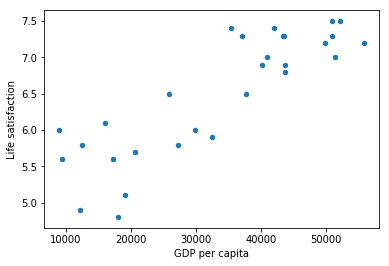

[[5.96242338]]


In [5]:
# load the data
oecd_bli = pd.read_csv(d1, thousands=',')
gdp_per_capita = pd.read_csv(d2, thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
lr = sklearn.linear_model.LinearRegression()
model = lr

# Select a neighbor model
# model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

**1. How would you define Machine Learning?**

_Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure._

**2. Can you name four types of problems where it shines?**

_Machine Learning is great for complex problems for which we have no algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining)._

**3. What is a labeled training set?**

_A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance._

**4. What are the two most common supervised tasks?**

_The two most common supervised tasks are regression and classification._

**5. Can you name four common unsupervised tasks?**

_Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning._

**6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?**

_Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains since this is typically the type of problem that Reinforcement Learning tackles. It might be possible to express the problem as a supervised or semisupervised learning problem, but it would be less natural._

**7. What type of algorithm would you use to segment your customers into multiple groups?**

_If you don’t know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups._

**8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?**

_Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their label (spam or not spam)._

**9. What is an online learning system?**

_An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data._

**10. What is out-of-core learning?**

_Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer’s main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches._

**11. What type of learning algorithm relies on a similarity measure to make predictions?**

_An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions._

**12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?**

_A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply)._

**13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?**

_Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance’s features into the model’s prediction function, using the parameter values found by the learning algorithm._

**14. Can you name four of the main challenges in Machine Learning?**

_Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data._

**15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?**

_If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data._

**16. What is a test set and why would you want to use it?**

_A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production._

**17. What is the purpose of a validation set?**

_A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters._

**18. What can go wrong if you tune hyperparameters using the test set?**

_If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect)._

**19. What is cross-validation and why would you prefer it to a validation set?**

_Cross-validation is a technique that makes it possible to compare models (for model selection and hyperparameter tuning) without the need for a separate validation set. This saves precious training data._

### grp